In [2]:
# Load required python libraries
from glob import glob
from tqdm import tqdm
from PIL import Image
from PIL import ImageFile
import cv2                
import os
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd

In [3]:
# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [4]:
dog_files[0]

'/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg'

In [27]:
import random
images_url = []
images_caption = []

for i in range(0,25):
    index = random.randint(0,len(dog_files)-1)
    name = os.path.basename(dog_files[index])
    name= name[:len(name)-10]
    images_url.append(dog_files[index])
    images_caption.append(name) 

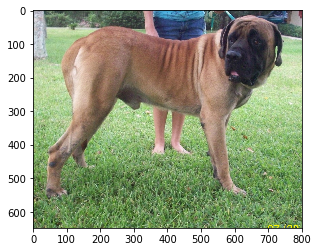

Label: {} /data/dog_images/train/103.Mastiff/Mastiff_06833.jpg


In [28]:
image = Image.open(dog_files[0])
plt.imshow(image)
plt.show()
print('Label: {}', dog_files[0])

In [32]:
%matplotlib inline

def plot_images(images_url,images_caption):
    plt.figure(figsize=[15,10])
    for i in range(25):
        plt.subplot(5,5,i+1)
        image = Image.open(images_url[i])
        plt.imshow(image)
        plt.title(images_caption[i])
        plt.axis('off')

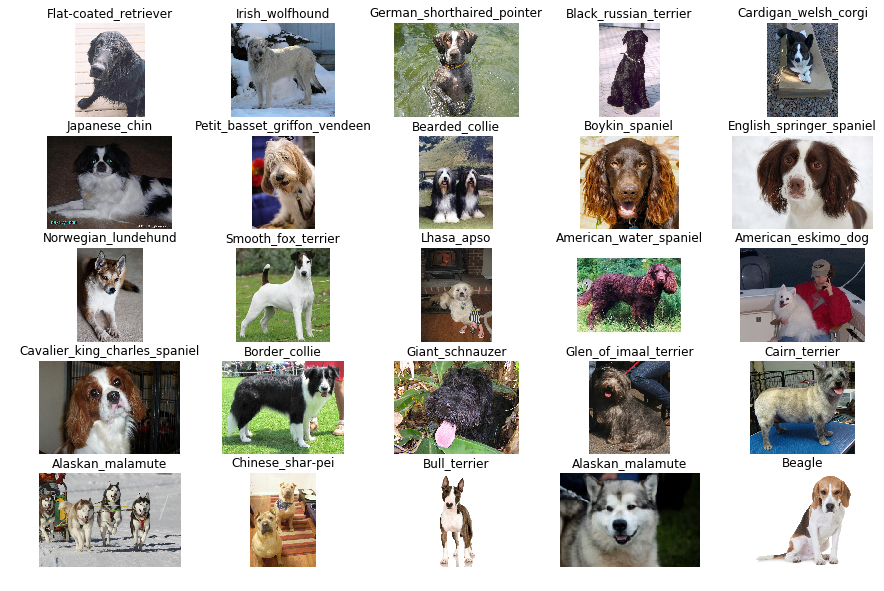

In [33]:
plot_images(images_url,images_caption)

In [34]:
images_url = []
images_caption = []

for i in range(0,len(dog_files)):
    index = random.randint(0,len(dog_files)-1)
    name = os.path.basename(dog_files[index])
    name= name[:len(name)-10]
    images_url.append(dog_files[index])
    images_caption.append(name) 

In [35]:
print(len(images_caption))

8351


In [37]:
count = {label: 1 for label in images_caption}

In [48]:
dictionary_count = {}

for key in images_caption:
    if key in dictionary_count:
        dictionary_count[key] += 1
    else:
        dictionary_count[key] = 1

In [ ]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=data_count)

In [68]:
data_count = pd.DataFrame.from_dict(dictionary_count, orient='index', columns=['Count'])

In [71]:
data_count = data_count.reset_index()

In [99]:
data_count = data_count.sort_values(by=['Count'])

In [98]:
data_count.head()

,index,Count
0,Belgian_sheepdog,77
1,Chihuahua,67
2,Italian_greyhound,96
3,Petit_basset_griffon_vendeen,32
4,American_eskimo_dog,89


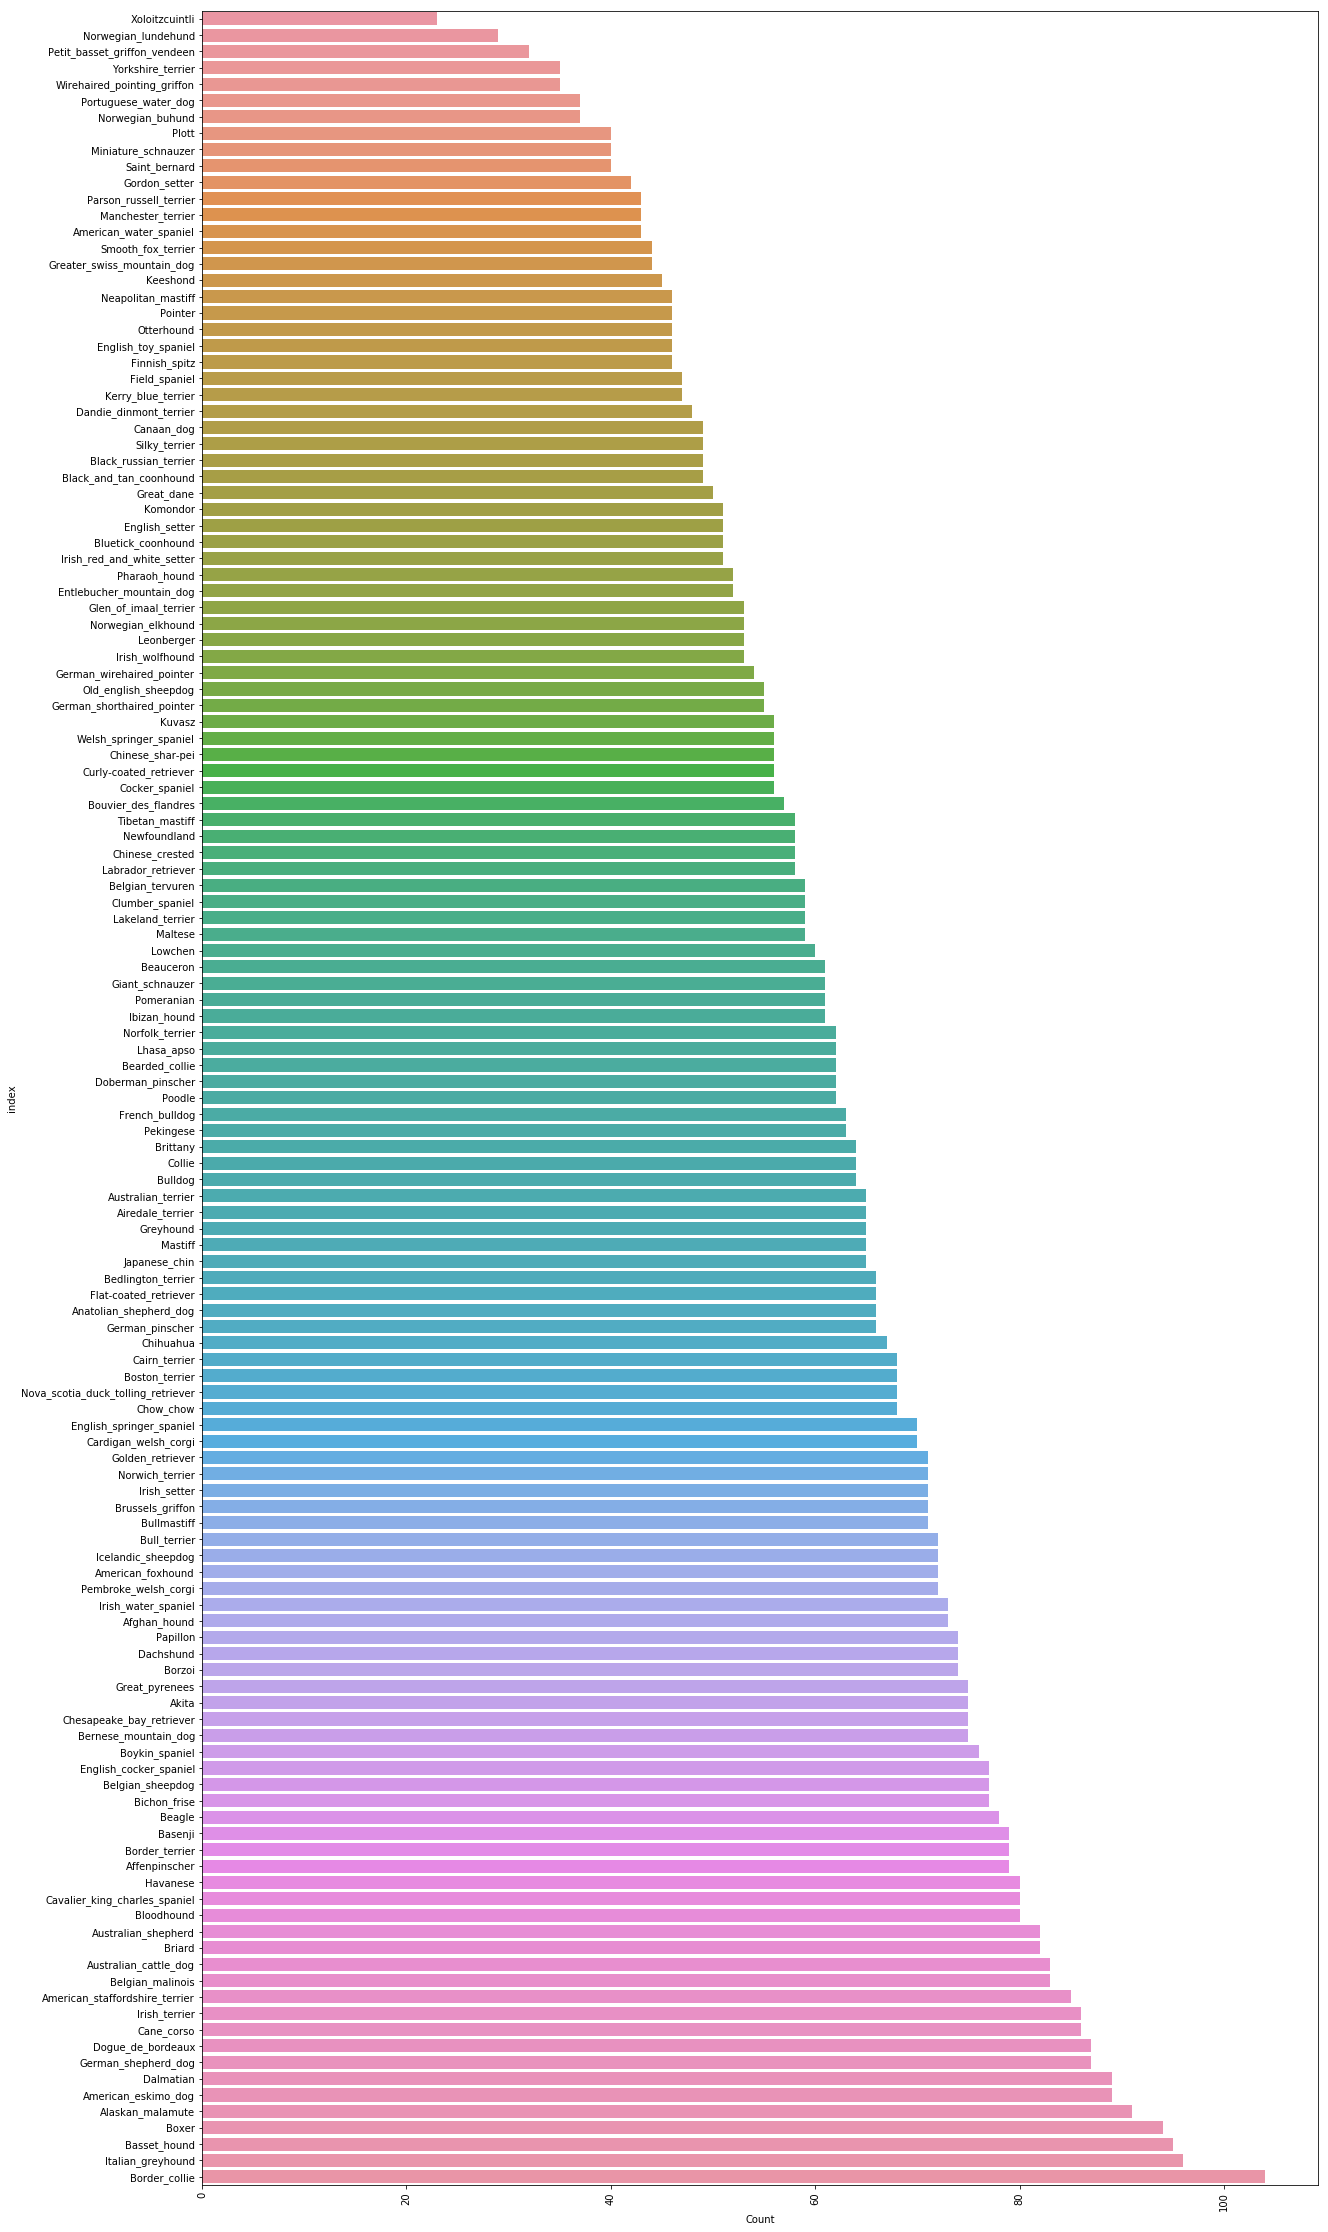

In [100]:
fig, ax = plt.subplots(figsize=(20,40))
p = sns.barplot(ax=ax, x="Count", y="index", data=data_count)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate label